# Angle variation computation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We want to compute the angle variation evolution for a window of size $n$, its average and variance.

Let be following quantities (the bar denotes the fact that these are samples - or vectors in time space if you want):
- $\bar{t} = (t_{1}, t_{2}, ..., t_{N})$
- $\bar{x} = (x_{1}, x_{2}, ..., x_{N})$
- $\bar{y} = (y_{1}, y_{2}, ..., y_{N})$
- $\bar{\textbf{r}} = ((x_{1}, y_{1}), (x_{2}, y_{2}), ...)$

For a size $1$ window, the angle variation is simply the position at each step.

For a size 2 window, we must compute : $t_{1}^{(2)} = \frac{t_{1} + t_{2}}{2}$, $t_{2}^{(2)} = \frac{t_{3} + t_{4}}{2}$, etc. (same for $x$ and $y$), so we straightfowardly derive :
- $t_{i}^{(2)} = \frac{t_{2i} + t_{2i+1}}{2}$
- $x_{i}^{(2)} = \frac{x_{2i} + x_{2i+1}}{2}$
- $y_{i}^{(2)} = \frac{y_{2i} + y_{2i+1}}{2}$
- $\textbf{r}_{i}^{(2)} = (x_{i}^{(2)}, y_{i}^{(2)}) $

The new elements are simply empirical averages of the raw data. We can therefore introduce the angle $\theta_{i}$ as the angle of the scalar product between the unit vector $\textbf{x}$ and the vector $\textbf{r}_{i}^{(2)}$ :

$$ \textbf{x}.\textbf{r}_{i}^{(2)} = ||\textbf{r}_{i}^{(2)}||\cos(\theta_{i}^{(2)}) = x_{i}^{(2)} $$
since $\textbf{x} = (1, 0)$. Thus, the angle variation is :

$$ \Delta \theta_{i+1}^{(2)} = \theta_{i+1}^{(2)} - \theta_{i}^{(2)} $$

More generally, we define : $N$ the number of elements in one vector of the data (number of time steps), $n$ the number of elements in the window ($n = 1, 2, 3, ..., $), the coordinate $q_{i}^{n}$ (it can be for the time, $x$ or $y$)such that :
$$q_{i}^{(n)} = \frac{1}{n} \sum_{j =0}^{n-1} q_{n.i + j} $$
and the angle $\theta_{i}^{(n)} = \theta(t_{i}^{(n)})$ as
$$ \theta(t_{i}^{(n)}) = \arccos\left( \frac{\textbf{x} . \textbf{r}}{||\textbf{r}||} \right) = \arccos\left( \frac{x_{i}^{(n)} }{\sqrt{(x_{i}^{(n)})^{2} + (y_{i}^{(n)})^{2}}} \right)$$


The angle variation is defined as the difference between two consecutive angles :
$$ \Delta \theta_{i+1}^{(n)} = \theta_{i+1}^{(n)} - \theta_{i}^{(n)} $$

In [2]:
filename = 'positions_centered.txt'
dat = np.loadtxt(filename, skiprows = 1)
N = len(dat)
cut = 10000 # Where cut the data. Default : Until the end
time, x0, y0, xL, yL = dat[:cut, 0], dat[:cut, 1], dat[:cut, 2], dat[:cut, 3], dat[:cut, 4]
theta0 = np.arccos(x0 / np.sqrt(x0*x0 + y0*y0))
thetaL = np.arccos(xL / np.sqrt(xL*xL + yL*yL))
dtheta0 = np.diff(theta0)
dthetaL = np.diff(thetaL)

In [34]:
nmax = 1000
eps = 1e-3
l = len(dat[:cut])

In [39]:
t_n, x0_n, y0_n, theta0_n, dtheta0_n, xL_n, yL_n, thetaL_n, dthetaL_n, dtheta0_avg, dthetaL_avg, dtheta0_var, dthetaL_var = [], [], [], [], [], [], [], [], [], [], [], [], []
def main(nmax) :
    global t_n, x0_n, y0_n, theta0_n, dtheta0_n, xL_n, yL_n, thetaL_n, dthetaL_n, dtheta0_avg, dthetaL_avg, dtheta0_var, dthetaL_var
    t_n = [[1, time]]
    x0_n, y0_n, theta0_n, dtheta0_n = [[1, x0]], [[1, y0]], [[1, theta0]], [[1, dtheta0]]
    xL_n, yL_n, thetaL_n, dthetaL_n = [[1, xL]], [[1, yL]], [[1, thetaL]], [[1, dthetaL]]
    dtheta0_avg, dthetaL_avg = [np.average(dtheta0)], [np.average(dthetaL)]
    dtheta0_var, dthetaL_var = [np.var(dtheta0)], [np.var(dthetaL)]

    for n in range(2, nmax+1) :
        r = l%n
    
        if r == 0 :
            t_n += [[n, np.average(np.split(time, l//n), axis=1)]]
        
            # First - 0
            x0_n += [[n, np.average(np.split(x0, l//n), axis=1)]]
            y0_n += [[n, np.average(np.split(y0, l//n), axis=1)]]
            theta0_n += [[n, np.average(np.split(theta0, l//n), axis=1)]]
            # Last - L
            xL_n += [[n, np.average(np.split(xL, l//n), axis=1)]]
            yL_n += [[n, np.average(np.split(yL, l//n), axis=1)]]
            thetaL_n += [[n, np.average(np.split(thetaL, l//n), axis=1)]]
        
            dtheta0_n += [[n, np.diff(theta0_n[n-1][1])]]
            dtheta0_avg += [np.average(dtheta0_n[n-1][1])]
            dtheta0_var += [np.var(dtheta0_n[n-1][1])]
        
            dthetaL_n += [[n, np.diff(thetaL_n[n-1][1])]]
            dthetaL_avg += [np.average(dthetaL_n[n-1][1])]
            dthetaL_var += [np.var(dthetaL_n[n-1][1])]
        else :
            l2 = len(time[:-r])
            t_n += [[n, np.average(np.split(time[:-r], l2//n), axis=1)]]
            x0_n += [[n, np.average(np.split(x0[:-r], l2//n), axis=1)]]
            y0_n += [[n, np.average(np.split(y0[:-r], l2//n), axis=1)]]
            theta0_n += [[n, np.average(np.split(theta0[:-r], l2//n), axis=1)]]
        
            xL_n += [[n, np.average(np.split(xL[:-r], l2//n), axis=1)]]
            yL_n += [[n, np.average(np.split(yL[:-r], l2//n), axis=1)]]
            thetaL_n += [[n, np.average(np.split(thetaL[:-r], l2//n), axis=1)]]
        
            dtheta0_n += [[n, np.diff(theta0_n[n-1][1])]]
            dtheta0_avg += [np.average(dtheta0_n[n-1][1])]
            dtheta0_var += [np.var(dtheta0_n[n-1][1])]
            dthetaL_n += [[n, np.diff(thetaL_n[n-1][1])]]
            dthetaL_avg += [np.average(dthetaL_n[n-1][1])]
            dthetaL_var += [np.var(dthetaL_n[n-1][1])]

In [41]:
main(3)
t_n

[[1, array([1.000e-07, 2.000e-07, 3.000e-07, ..., 9.998e-04, 9.999e-04,
         1.000e-03])],
 [2, array([1.5000e-07, 3.5000e-07, 5.5000e-07, ..., 9.9955e-04, 9.9975e-04,
         9.9995e-04])],
 [3, array([2.000e-07, 5.000e-07, 8.000e-07, ..., 9.992e-04, 9.995e-04,
         9.998e-04])]]

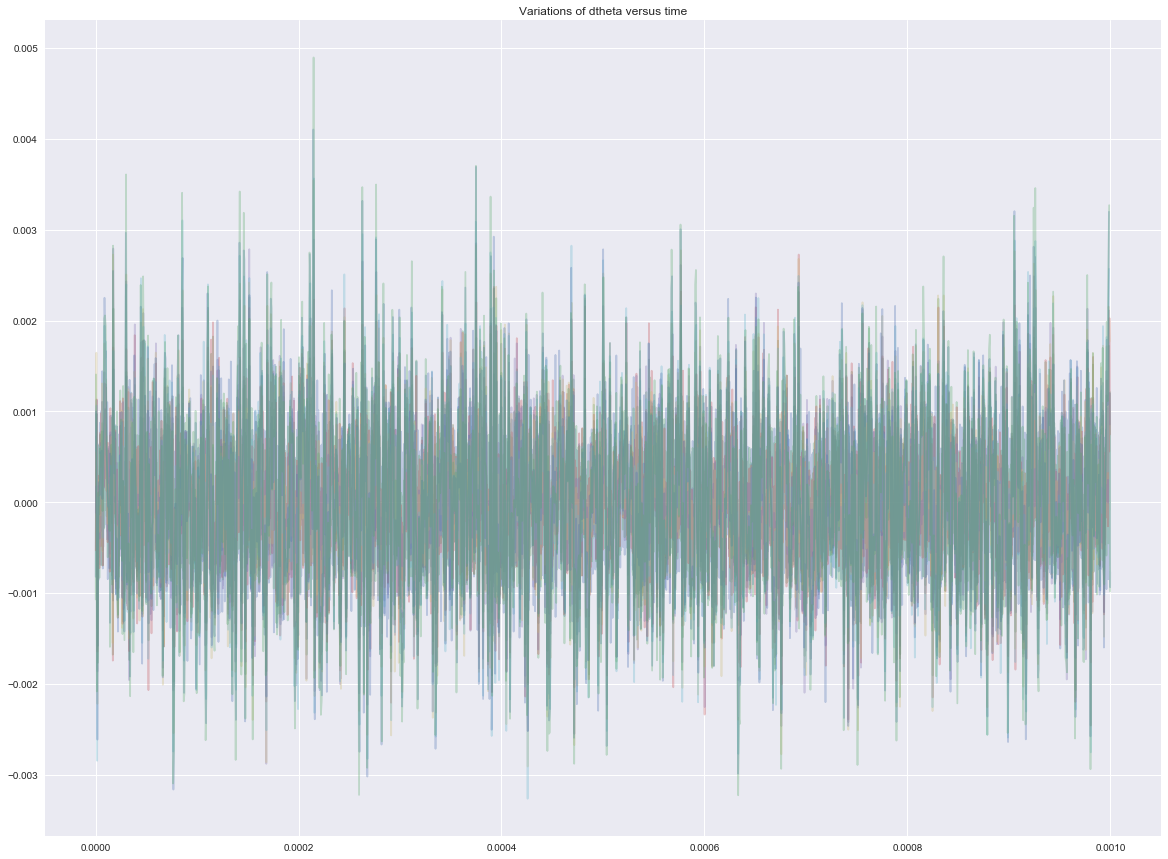

In [42]:
nmax = 10
main(nmax)
sns.set()
a4_dims = (20, 15)
fig, ax = plt.subplots(figsize=a4_dims)
for n in range(1, nmax-1) :
    plt.plot(t_n[n-1][1][:-1], dtheta0_n[n-1][1], label = str(dtheta0_n[n-1][0]), alpha = 0.3)
plt.title('Variations of dtheta versus time')
plt.show()

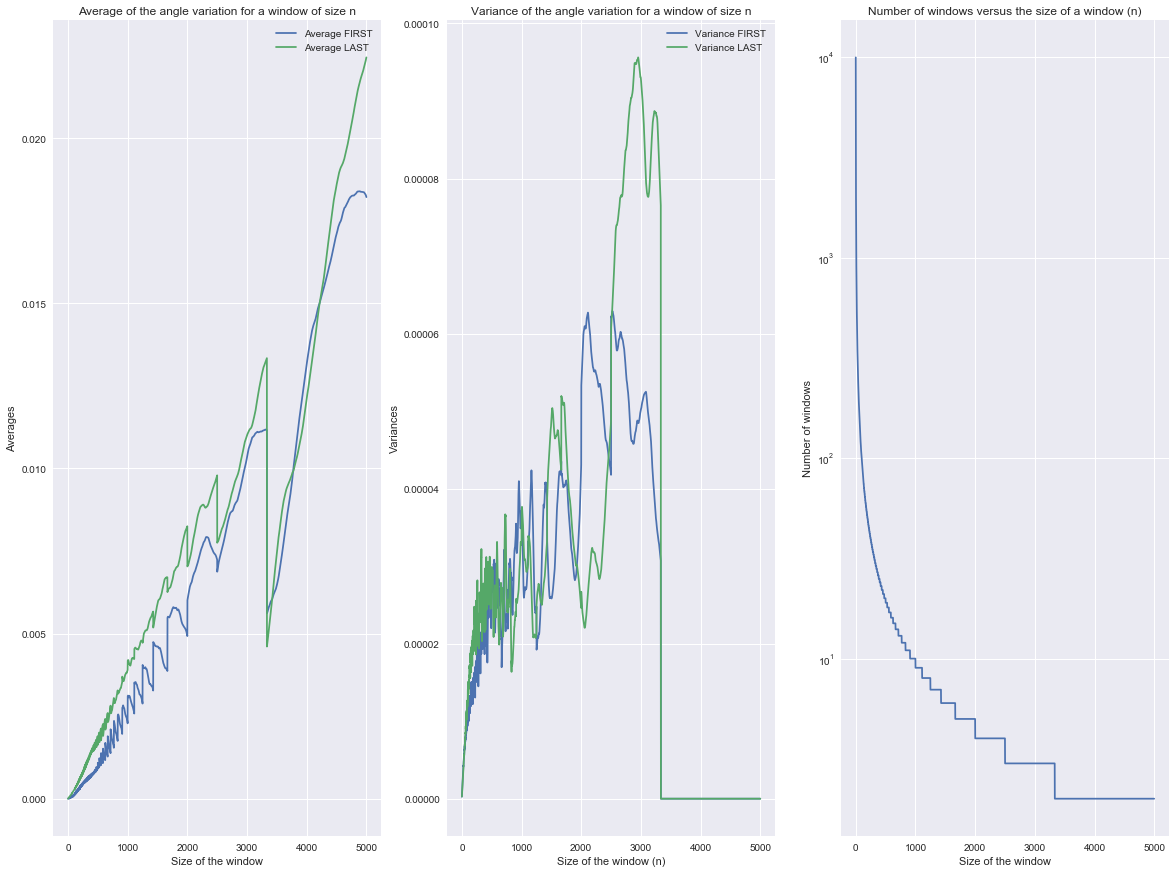

In [51]:
nmax = 5000
main(nmax)
sns.set()
a4_dims = (20, 15)
fig2, ax2 = plt.subplots(1, 3,figsize=a4_dims)
ax2[0].plot(np.abs(dtheta0_avg), label = 'Average FIRST')
ax2[0].plot(np.abs(dthetaL_avg), label = 'Average LAST')
ax2[0].set_xlabel('Size of the window')
ax2[0].set_ylabel('Averages')
ax2[0].set_title('Average of the angle variation for a window of size n')
ax2[0].legend()
ax2[1].plot(dtheta0_var, label = 'Variance FIRST')
ax2[1].plot(dthetaL_var, label = 'Variance LAST')
ax2[1].set_xlabel('Size of the window (n)')
ax2[1].set_ylabel('Variances')
ax2[1].set_title('Variance of the angle variation for a window of size n')
ax2[1].legend()
ax2[2].semilogy(l//np.arange(1, nmax))
ax2[2].set_title('Number of windows versus the size of a window (n)')
ax2[2].set_xlabel('Size of the window')
ax2[2].set_ylabel('Number of windows')
plt.show()

In the above plots, we can see :
- the average increase linearly with $n$ until roughly 3000-size window. This is due to ???????????
- the sharp decrease to zero of the variance for the two ends : this is due to the fact that there is no more variance : the window is too large (there is only one last set), hence one value for the angle variation, so no variance. Just before this, the variance is really noisy due to the lack of sets, hence angle variation points.

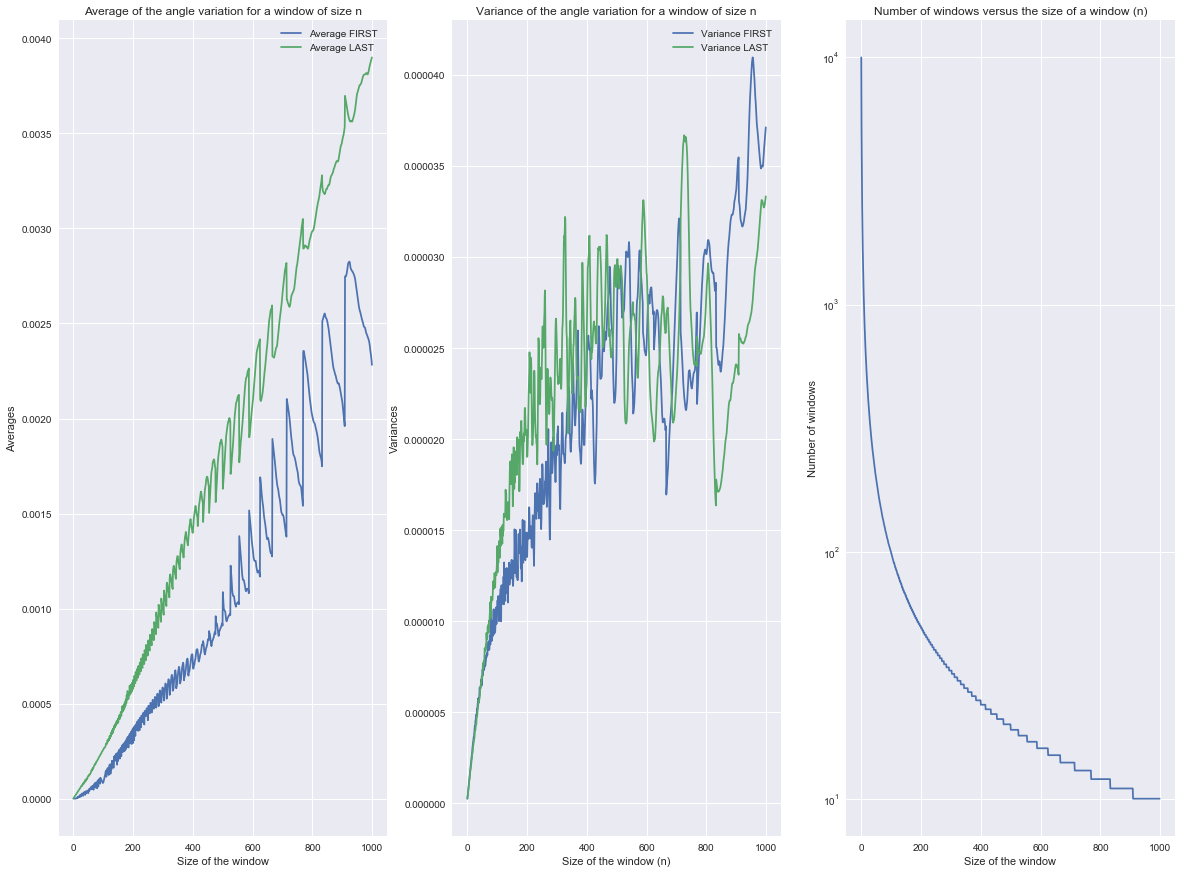

In [56]:
nmax = 1000
main(nmax)
sns.set()
a4_dims = (20, 15)
fig2, ax2 = plt.subplots(1, 3,figsize=a4_dims)
ax2[0].plot(np.abs(dtheta0_avg), label = 'Average FIRST')
ax2[0].plot(np.abs(dthetaL_avg), label = 'Average LAST')
ax2[0].set_xlabel('Size of the window')
ax2[0].set_ylabel('Averages')
ax2[0].set_title('Average of the angle variation for a window of size n')
ax2[0].legend()
ax2[1].plot(dtheta0_var, label = 'Variance FIRST')
ax2[1].plot(dthetaL_var, label = 'Variance LAST')
ax2[1].set_xlabel('Size of the window (n)')
ax2[1].set_ylabel('Variances')
ax2[1].set_title('Variance of the angle variation for a window of size n')
ax2[1].legend()
ax2[2].semilogy(l//np.arange(1, nmax))
ax2[2].set_title('Number of windows versus the size of a window (n)')
ax2[2].set_xlabel('Size of the window')
ax2[2].set_ylabel('Number of windows')
plt.show()

We can clearly see a plateau in the variance between window of size 400 to 600. After, it starts to be more and more noisy, because of the lack of data (we are reducing the number of $\Delta \theta$ hence the statistics becomes les and less good)

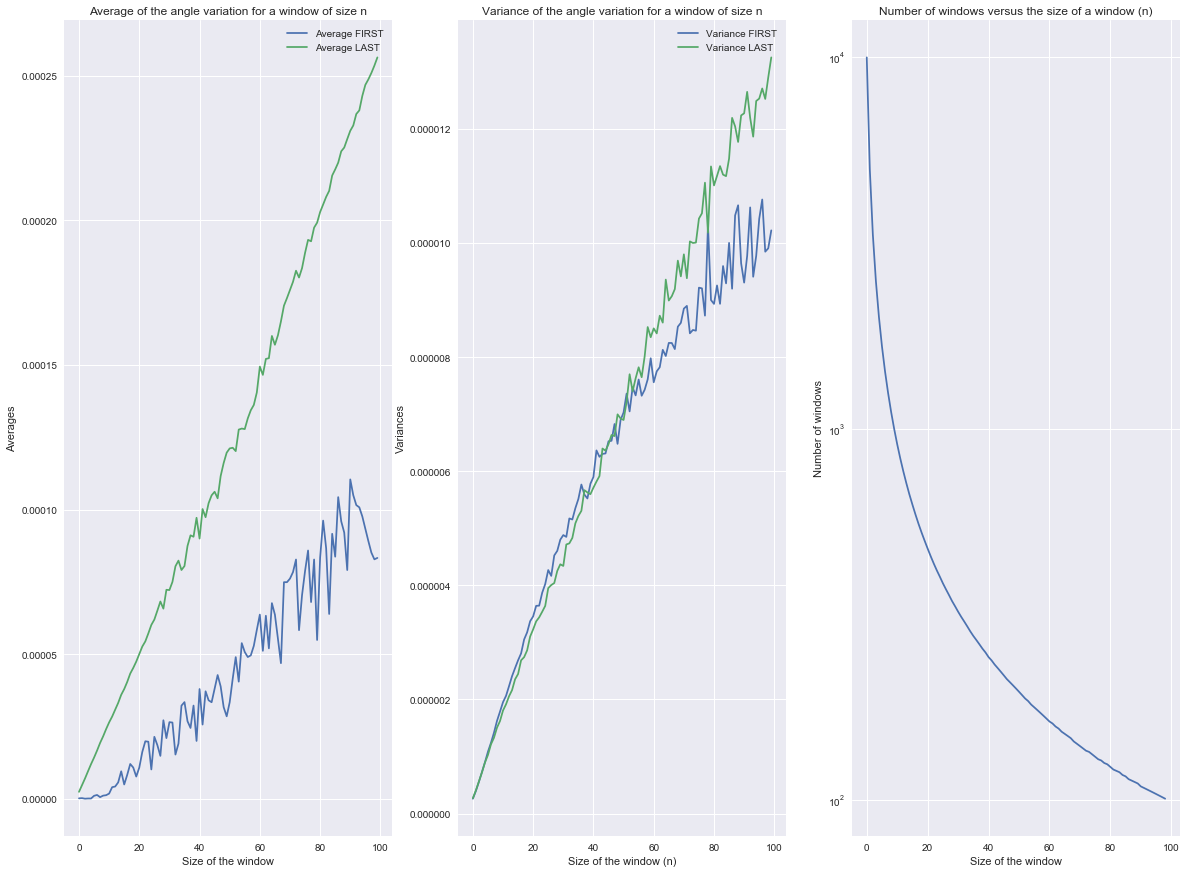

In [58]:
nmax = 100
main(nmax)
sns.set()
a4_dims = (20, 15)
fig2, ax2 = plt.subplots(1, 3,figsize=a4_dims)
ax2[0].plot(np.abs(dtheta0_avg), label = 'Average FIRST')
ax2[0].plot(np.abs(dthetaL_avg), label = 'Average LAST')
ax2[0].set_xlabel('Size of the window')
ax2[0].set_ylabel('Averages')
ax2[0].set_title('Average of the angle variation for a window of size n')
ax2[0].legend()
ax2[1].plot(dtheta0_var, label = 'Variance FIRST')
ax2[1].plot(dthetaL_var, label = 'Variance LAST')
ax2[1].set_xlabel('Size of the window (n)')
ax2[1].set_ylabel('Variances')
ax2[1].set_title('Variance of the angle variation for a window of size n')
ax2[1].legend()
ax2[2].semilogy(l//np.arange(1, nmax))
ax2[2].set_title('Number of windows versus the size of a window (n)')
ax2[2].set_xlabel('Size of the window')
ax2[2].set_ylabel('Number of windows')
plt.show()